# Mixture Density Networks

Mixture density networks (MDN) (Bishop, 1994) are a class
of models obtained by combining a conventional neural network with a
mixture density model.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import inferpy as inf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp

from scipy import stats
from sklearn.model_selection import train_test_split

/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

## Data

We use the same toy data from
[David Ha's blog post](http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/), where he explains MDNs. It is an inverse problem where
for every input $x_n$ there are multiple outputs $y_n$.

Size of features in training data: (5000, 1)
Size of output in training data: (5000,)


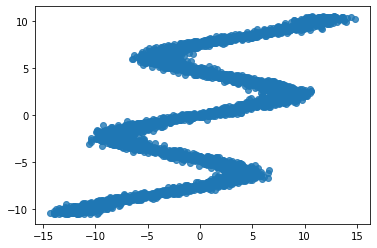

In [11]:
def build_toy_dataset(N):
    y_data = np.random.uniform(-10.5, 10.5, N).astype(np.float32)
    r_data = np.random.normal(size=N).astype(np.float32)    # random noise
    x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
    x_data = x_data.reshape((N, 1))
    return x_data, y_data

import random 

tf.random.set_random_seed(42)
np.random.seed(42)
random.seed(42)

#inf.setseed(42)

N = 5000    # number of data points
D = 1    # number of features
K = 20    # number of mixture components

x_train, y_train = build_toy_dataset(N)


print("Size of features in training data: {}".format(x_train.shape))
print("Size of output in training data: {}".format(y_train.shape))
sns.regplot(x_train, y_train, fit_reg=False)
plt.show()

## Fitting a Neural Network

We could try to fit a neural network over this data set. However, for each x value in this dataset there are multiple y values. So, it poses problems on the use of standard neural networks.

Let's first define the neural network. We use `tf.keras.layers` to construct neural networks. We specify a three-layer network with 15 hidden units for each hidden layer.

In [3]:
nnetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=None),
])

The following code fits the neural network to the data

In [4]:
lossfunc = lambda y_out, y: tf.nn.l2_loss(y_out-y)
nnetwork.compile(tf.train.AdamOptimizer(0.1), lossfunc)
nnetwork.fit(x=x_train, y=y_train, epochs=1000)

Epoch 1/3000
5000/5000 [==============================] - 0s 64us/sample - loss: 386.4314
Epoch 2/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 360.6320
Epoch 3/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 363.7711
Epoch 4/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 364.7580
Epoch 5/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 362.9175
Epoch 6/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 367.5114
Epoch 7/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 362.0606
Epoch 8/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 363.0019
Epoch 9/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 356.8691
Epoch 10/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 362.5977
Epoch 11/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 362.6654
Epoch 12

5000/5000 [==============================] - 0s 34us/sample - loss: 360.0522
Epoch 92/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 369.0349
Epoch 93/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 362.4380
Epoch 94/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 368.5124
Epoch 95/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 360.0939
Epoch 96/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 364.2502
Epoch 97/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 372.9842
Epoch 98/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 358.5589
Epoch 99/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 359.4508
Epoch 100/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 359.7468
Epoch 101/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 360.5667
Epoch 102/3

5000/5000 [==============================] - 0s 30us/sample - loss: 363.9764
Epoch 181/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 362.3177
Epoch 182/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 364.0881
Epoch 183/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 363.2503
Epoch 184/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 370.2213
Epoch 185/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 364.6288
Epoch 186/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 363.3011
Epoch 187/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 363.4206
Epoch 188/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 366.9942
Epoch 189/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 361.4601
Epoch 190/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 362.9899
Epo

5000/5000 [==============================] - 0s 30us/sample - loss: 364.6570
Epoch 270/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 365.0877
Epoch 271/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 368.0628
Epoch 272/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 365.6678
Epoch 273/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 362.7751
Epoch 274/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 364.7246
Epoch 275/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 365.0492
Epoch 276/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 364.8601
Epoch 277/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 364.1762
Epoch 278/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 364.6124
Epoch 279/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 366.2583
Epo

5000/5000 [==============================] - 0s 29us/sample - loss: 363.9693
Epoch 359/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 367.0705
Epoch 360/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 363.6906
Epoch 361/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 366.0514
Epoch 362/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 364.4086
Epoch 363/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 363.3088
Epoch 364/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 366.2021
Epoch 365/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 365.2292
Epoch 366/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 366.0902
Epoch 367/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 365.7666
Epoch 368/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 367.5124
Epo

5000/5000 [==============================] - 0s 35us/sample - loss: 366.8863
Epoch 448/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 364.2701
Epoch 449/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 363.7218
Epoch 450/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 366.8358
Epoch 451/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 369.7361
Epoch 452/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 364.3592
Epoch 453/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 361.9966
Epoch 454/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 363.8939
Epoch 455/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 363.2035
Epoch 456/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 364.1896
Epoch 457/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 365.0710
Epo

5000/5000 [==============================] - 0s 32us/sample - loss: 364.5598
Epoch 537/3000
5000/5000 [==============================] - 0s 38us/sample - loss: 364.8638
Epoch 538/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 367.7602
Epoch 539/3000
5000/5000 [==============================] - 0s 26us/sample - loss: 365.1817
Epoch 540/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 365.3031
Epoch 541/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 363.0982
Epoch 542/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 367.6257
Epoch 543/3000
5000/5000 [==============================] - 0s 41us/sample - loss: 364.6627
Epoch 544/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 364.9259
Epoch 545/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 366.2321
Epoch 546/3000
5000/5000 [==============================] - 0s 39us/sample - loss: 364.9713
Epo

5000/5000 [==============================] - 0s 27us/sample - loss: 365.9205
Epoch 626/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 364.5330
Epoch 627/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 365.5125
Epoch 628/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 363.6276
Epoch 629/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 365.9578
Epoch 630/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 367.5671
Epoch 631/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 363.5209
Epoch 632/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 366.4900
Epoch 633/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 364.7300
Epoch 634/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 360.7922
Epoch 635/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 365.5487
Epo

5000/5000 [==============================] - 0s 30us/sample - loss: 362.2239
Epoch 715/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 365.7812
Epoch 716/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 369.1963
Epoch 717/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 364.4586
Epoch 718/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 371.8804
Epoch 719/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 367.1431
Epoch 720/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 368.1919
Epoch 721/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 371.3033
Epoch 722/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 366.8179
Epoch 723/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 364.5620
Epoch 724/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 363.5733
Epo

5000/5000 [==============================] - 0s 32us/sample - loss: 366.1155
Epoch 804/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 370.5252
Epoch 805/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 367.2920
Epoch 806/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 365.9477
Epoch 807/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 367.2119
Epoch 808/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 374.3865
Epoch 809/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 380.3452
Epoch 810/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 362.7212
Epoch 811/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 367.0573
Epoch 812/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 366.7376
Epoch 813/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 370.4366
Epo

5000/5000 [==============================] - 0s 29us/sample - loss: 366.4683
Epoch 893/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 365.5109
Epoch 894/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 365.8878
Epoch 895/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 363.5425
Epoch 896/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 365.4531
Epoch 897/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 363.5600
Epoch 898/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 362.8319
Epoch 899/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 366.0469
Epoch 900/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 363.7420
Epoch 901/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 364.6113
Epoch 902/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 367.1251
Epo

5000/5000 [==============================] - 0s 28us/sample - loss: 361.7305
Epoch 982/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 367.1303
Epoch 983/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 365.2056
Epoch 984/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 363.3481
Epoch 985/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 364.3370
Epoch 986/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 363.9154
Epoch 987/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 365.4585
Epoch 988/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 369.2111
Epoch 989/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 363.8919
Epoch 990/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 366.1468
Epoch 991/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 366.3051
Epo

5000/5000 [==============================] - 0s 33us/sample - loss: 363.8888
Epoch 1070/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 364.2867
Epoch 1071/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 367.6948
Epoch 1072/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 364.1208
Epoch 1073/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 365.5378
Epoch 1074/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 364.4938
Epoch 1075/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 364.4714
Epoch 1076/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 363.4687
Epoch 1077/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 368.4353
Epoch 1078/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 366.9248
Epoch 1079/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 36

5000/5000 [==============================] - 0s 31us/sample - loss: 363.5273
Epoch 1158/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 362.5845
Epoch 1159/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 367.8512
Epoch 1160/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 361.4810
Epoch 1161/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 370.4384
Epoch 1162/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 366.9193
Epoch 1163/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 365.9911
Epoch 1164/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 365.2834
Epoch 1165/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 365.3871
Epoch 1166/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 367.4247
Epoch 1167/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 36

5000/5000 [==============================] - 0s 29us/sample - loss: 363.7037
Epoch 1246/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 366.1167
Epoch 1247/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 363.5509
Epoch 1248/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 366.2006
Epoch 1249/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 363.9243
Epoch 1250/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 364.9427
Epoch 1251/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 362.9909
Epoch 1252/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 369.0350
Epoch 1253/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 366.5941
Epoch 1254/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 367.7737
Epoch 1255/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 36

5000/5000 [==============================] - 0s 31us/sample - loss: 453.4415
Epoch 1334/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 447.4461
Epoch 1335/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 446.5735
Epoch 1336/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 451.2247
Epoch 1337/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.5873
Epoch 1338/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 451.6406
Epoch 1339/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 446.1216
Epoch 1340/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 449.8622
Epoch 1341/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 449.4997
Epoch 1342/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.6636
Epoch 1343/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 44

5000/5000 [==============================] - 0s 32us/sample - loss: 449.3320
Epoch 1422/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.2753
Epoch 1423/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.4826
Epoch 1424/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.9239
Epoch 1425/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 451.7259
Epoch 1426/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.9791
Epoch 1427/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.0411
Epoch 1428/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 450.7249
Epoch 1429/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 446.7312
Epoch 1430/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 450.4878
Epoch 1431/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 44

5000/5000 [==============================] - 0s 27us/sample - loss: 448.6661
Epoch 1510/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 448.4876
Epoch 1511/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 451.2707
Epoch 1512/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 450.3756
Epoch 1513/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 446.8798
Epoch 1514/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 446.9296
Epoch 1515/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.2742
Epoch 1516/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.5497
Epoch 1517/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 450.0767
Epoch 1518/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 455.1407
Epoch 1519/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 44

5000/5000 [==============================] - 0s 29us/sample - loss: 447.7744
Epoch 1598/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.7433
Epoch 1599/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.0429
Epoch 1600/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 446.5709
Epoch 1601/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 446.7650
Epoch 1602/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 451.2879
Epoch 1603/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 449.4112
Epoch 1604/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 447.7680
Epoch 1605/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.3981
Epoch 1606/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 449.7946
Epoch 1607/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 44

5000/5000 [==============================] - 0s 35us/sample - loss: 451.1654
Epoch 1686/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.8167
Epoch 1687/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 446.7940
Epoch 1688/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 446.3247
Epoch 1689/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 451.8299
Epoch 1690/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.4934
Epoch 1691/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 447.6551
Epoch 1692/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.9249
Epoch 1693/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 447.0026
Epoch 1694/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 449.2940
Epoch 1695/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 44

5000/5000 [==============================] - 0s 31us/sample - loss: 449.1418
Epoch 1774/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 454.1215
Epoch 1775/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.6343
Epoch 1776/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 448.5910
Epoch 1777/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.8583
Epoch 1778/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 447.8952
Epoch 1779/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 447.1480
Epoch 1780/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 447.0203
Epoch 1781/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 449.8083
Epoch 1782/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 448.9098
Epoch 1783/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 44

5000/5000 [==============================] - 0s 31us/sample - loss: 447.5421
Epoch 1862/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.5921
Epoch 1863/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.5533
Epoch 1864/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.0378
Epoch 1865/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 445.8530
Epoch 1866/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.5374
Epoch 1867/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 445.1525
Epoch 1868/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 449.9470
Epoch 1869/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 447.1031
Epoch 1870/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 450.8537
Epoch 1871/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 44

5000/5000 [==============================] - 0s 30us/sample - loss: 449.7054
Epoch 1950/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 446.9011
Epoch 1951/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.3399
Epoch 1952/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 447.7873
Epoch 1953/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 450.4450
Epoch 1954/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 448.0063
Epoch 1955/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 446.4405
Epoch 1956/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.9048
Epoch 1957/3000
5000/5000 [==============================] - 0s 27us/sample - loss: 447.7935
Epoch 1958/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 446.1720
Epoch 1959/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 44

5000/5000 [==============================] - 0s 29us/sample - loss: 448.2324
Epoch 2038/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.4743
Epoch 2039/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.2811
Epoch 2040/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.9900
Epoch 2041/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.8086
Epoch 2042/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 451.4591
Epoch 2043/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 446.8320
Epoch 2044/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 450.7871
Epoch 2045/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.4197
Epoch 2046/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 448.1090
Epoch 2047/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 44

5000/5000 [==============================] - 0s 29us/sample - loss: 448.0850
Epoch 2126/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.4708
Epoch 2127/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 447.3846
Epoch 2128/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 446.9230
Epoch 2129/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 454.9334
Epoch 2130/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.0128
Epoch 2131/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 449.8196
Epoch 2132/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 446.2566
Epoch 2133/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 449.4694
Epoch 2134/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 447.6466
Epoch 2135/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 44

5000/5000 [==============================] - 0s 30us/sample - loss: 446.3611
Epoch 2214/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 448.8603
Epoch 2215/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 446.4857
Epoch 2216/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 447.7361
Epoch 2217/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 449.3764
Epoch 2218/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 451.7488
Epoch 2219/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 448.3714
Epoch 2220/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.6498
Epoch 2221/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 450.7292
Epoch 2222/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.0262
Epoch 2223/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 44

5000/5000 [==============================] - 0s 44us/sample - loss: 447.7735
Epoch 2302/3000
5000/5000 [==============================] - 0s 28us/sample - loss: 448.3930
Epoch 2303/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 446.9963
Epoch 2304/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 446.3032
Epoch 2305/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.4163
Epoch 2306/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 446.8774
Epoch 2307/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.5880
Epoch 2308/3000
5000/5000 [==============================] - 0s 40us/sample - loss: 447.3935
Epoch 2309/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.7191
Epoch 2310/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.4346
Epoch 2311/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 44

5000/5000 [==============================] - 0s 33us/sample - loss: 448.7018
Epoch 2390/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.8090
Epoch 2391/3000
5000/5000 [==============================] - 0s 39us/sample - loss: 447.8635
Epoch 2392/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 451.6542
Epoch 2393/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 446.4682
Epoch 2394/3000
5000/5000 [==============================] - 0s 40us/sample - loss: 449.1820
Epoch 2395/3000
5000/5000 [==============================] - 0s 40us/sample - loss: 447.3664
Epoch 2396/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 445.5045
Epoch 2397/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.5892
Epoch 2398/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 451.9122
Epoch 2399/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 44

5000/5000 [==============================] - 0s 33us/sample - loss: 448.8361
Epoch 2478/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 449.6731
Epoch 2479/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 448.4300
Epoch 2480/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 447.3545
Epoch 2481/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 450.0850
Epoch 2482/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.5689
Epoch 2483/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 449.3144
Epoch 2484/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 448.3660
Epoch 2485/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 448.6211
Epoch 2486/3000
5000/5000 [==============================] - 0s 26us/sample - loss: 447.6953
Epoch 2487/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 45

5000/5000 [==============================] - 0s 33us/sample - loss: 452.4304
Epoch 2566/3000
5000/5000 [==============================] - 0s 38us/sample - loss: 447.7297
Epoch 2567/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.7624
Epoch 2568/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.9108
Epoch 2569/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.9273
Epoch 2570/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 452.0249
Epoch 2571/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.4342
Epoch 2572/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.2876
Epoch 2573/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 450.7859
Epoch 2574/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 447.5330
Epoch 2575/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 44

Epoch 2653/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 451.4560
Epoch 2654/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.5857
Epoch 2655/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.8546
Epoch 2656/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 449.2960
Epoch 2657/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.7934
Epoch 2658/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 447.8686
Epoch 2659/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.9532
Epoch 2660/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 445.8629
Epoch 2661/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.3252
Epoch 2662/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.6264
Epoch 2663/3000
5000/5000 [==============================] - 0s 33us/s

5000/5000 [==============================] - 0s 34us/sample - loss: 449.3777
Epoch 2742/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.5840
Epoch 2743/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 450.0666
Epoch 2744/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 446.4651
Epoch 2745/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 447.4390
Epoch 2746/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 449.4260
Epoch 2747/3000
5000/5000 [==============================] - 0s 37us/sample - loss: 447.3482
Epoch 2748/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.1787
Epoch 2749/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 447.7330
Epoch 2750/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 448.3239
Epoch 2751/3000
5000/5000 [==============================] - 0s 34us/sample - loss: 45

5000/5000 [==============================] - 0s 31us/sample - loss: 446.9497
Epoch 2830/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.6069
Epoch 2831/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 451.2984
Epoch 2832/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 450.0543
Epoch 2833/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 448.2414
Epoch 2834/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 448.0192
Epoch 2835/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 446.6153
Epoch 2836/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.1131
Epoch 2837/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 448.6775
Epoch 2838/3000
5000/5000 [==============================] - 0s 29us/sample - loss: 447.1609
Epoch 2839/3000
5000/5000 [==============================] - 0s 30us/sample - loss: 45

5000/5000 [==============================] - 0s 31us/sample - loss: 447.5487
Epoch 2918/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 449.3889
Epoch 2919/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 448.2125
Epoch 2920/3000
5000/5000 [==============================] - 0s 36us/sample - loss: 447.6451
Epoch 2921/3000
5000/5000 [==============================] - 0s 38us/sample - loss: 450.6383
Epoch 2922/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.3837
Epoch 2923/3000
5000/5000 [==============================] - 0s 32us/sample - loss: 447.3545
Epoch 2924/3000
5000/5000 [==============================] - 0s 35us/sample - loss: 448.1932
Epoch 2925/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 449.8828
Epoch 2926/3000
5000/5000 [==============================] - 0s 31us/sample - loss: 447.6865
Epoch 2927/3000
5000/5000 [==============================] - 0s 33us/sample - loss: 44

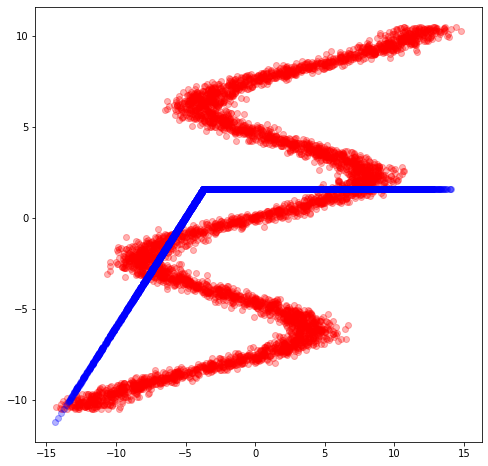

In [9]:
x_test, _ = build_toy_dataset(N)          
y_test = nnetwork.predict(x_test)

plt.figure(figsize=(8, 8))
plt.plot(x_train,y_train,'ro',x_test,y_test,'bo',alpha=0.3)
plt.show()

It can be seen, the neural network is not able to fit this data.

## Mixture Density Network (MDN)

We use a MDN with a mixture of 20 normal distributions parameterized by a
feedforward network. That is, the membership probabilities and
per-component means and standard deviations are given by the output of a
feedforward network.


We define our probabilistic model using InferPy constructs. Specifically, we use the `MixtureGaussian` distribution, where the the parameters of this network are provided by the feedforwrad network.

In [6]:
def neural_network(X):
    """loc, scale, logits = NN(x; theta)"""
    # 2 hidden layers with 15 hidden units
    net = tf.keras.layers.Dense(15, activation=tf.nn.relu)(X)
    net = tf.keras.layers.Dense(15, activation=tf.nn.relu)(net)
    locs = tf.keras.layers.Dense(K, activation=None)(net)
    scales = tf.keras.layers.Dense(K, activation=tf.exp)(net)
    logits = tf.keras.layers.Dense(K, activation=None)(net)
    return locs, scales, logits

@inf.probmodel
def mdn():
    with inf.datamodel():
        x = inf.Normal(loc = tf.ones([D]), scale = 1.0, name="x")
        locs, scales, logits = neural_network(x)
        y = inf.MixtureGaussian(locs, scales, logits=logits, name="y")
        
m = mdn()

Note that we use the `MixtureGaussian` random variable. It collapses
out the membership assignments for each data point and makes the model
differentiable with respect to all its parameters. It takes a
list as input—denoting the probability or logits for each
cluster assignment—as well as `components`, which are lists of loc and scale values.

For more background on MDNs, take a look at
[Christopher Bonnett's blog post](http://cbonnett.github.io/MDN.html) or at Bishop (1994).

## Inference

Next we train the MDN model. For details, see the documentation about
[Inference in Inferpy](https://inferpy.readthedocs.io/projects/develop/en/develop/notes/guideinference.html)

In [7]:
@inf.probmodel
def qmodel():
        return;

VI = inf.inference.VI(qmodel(), epochs=3000)
m.fit({"y": y_train, "x":x_train}, VI)


 0 epochs	 129578.296875....................
 200 epochs	 113883.59375....................
 400 epochs	 110369.765625....................
 600 epochs	 108294.28125....................
 800 epochs	 107746.5546875....................
 1000 epochs	 106972.796875....................
 1200 epochs	 106735.6640625....................
 1400 epochs	 106425.6875....................
 1600 epochs	 106105.2734375....................
 1800 epochs	 106036.7265625....................
 2000 epochs	 105984.7578125....................
 2200 epochs	 105787.0859375....................
 2400 epochs	 105733.0546875....................
 2600 epochs	 105704.171875....................
 2800 epochs	 105681.078125....................

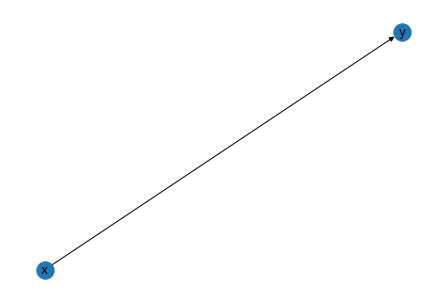

In [13]:
m.plot_graph()

After training, we can now see how the same network embbeded in a mixture model is able to perfectly capture the training data.

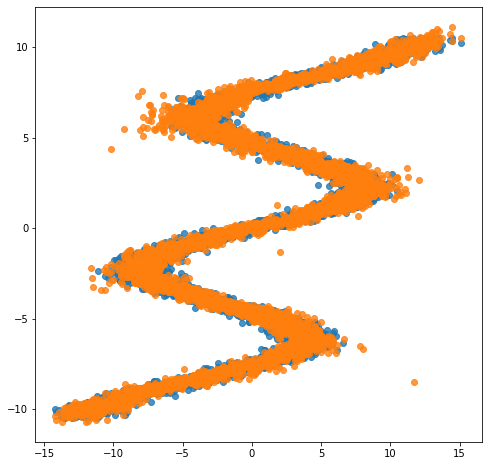

In [8]:
X_test, y_test = build_toy_dataset(N)
y_pred = m.posterior_predictive(["y"], data = {"x": X_test}).sample()

plt.figure(figsize=(8, 8))
sns.regplot(X_test, y_test, fit_reg=False)
sns.regplot(X_test, y_pred, fit_reg=False)
plt.show()

## Acknowledgments

This tutorial is inspired by [David Ha's blog post](http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/) and [Edward's tutorial](http://edwardlib.org/tutorials/mixture-density-network).